## Задание 09
В этом задании мы разберемся с тем, как работают методы снижения размерности и кластеризации данных. 
Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).  Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше), также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице. 

Мы представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков. 

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Скачайте данные самостоятельно. Объедините тестовую и обучающую выборку в одну (для задачи кластеризации тестовая выборка не понадобится). 

In [71]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))


* Определите число уникальных значений меток целевого класса. Будем использовать это значения для числа кластеров (в общем случае, число кластеров, мы естественно не знаем). 

In [72]:
uniq_y=np.unique(y)
uniq_y

array([1, 2, 3, 4, 5, 6])

In [73]:
n = len(uniq_y)
n

6

* Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [74]:
from sklearn.preprocessing import StandardScaler

X_sc = StandardScaler().fit_transform(X)

* С помощью PCA, оставьте столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

In [79]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X_sc)

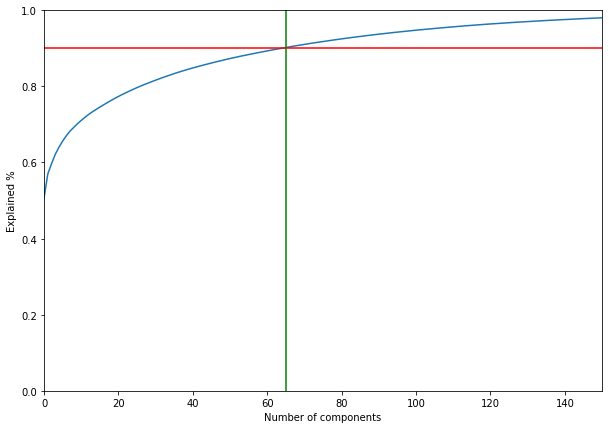

In [80]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained %')
plt.xlim(0,150)
plt.ylim(0,1)
plt.axhline(0.9, c='r')
plt.axvline(65, c='g')

plt.show();

Минимум 65 главных компонент необходимо выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных

* Сколько процентов дисперсии приходится на первую главную компоненту?

In [81]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% ".format(i + 1, round(100 * pca.explained_variance_ratio_[i],5)))

1 component: 50.73822% 
2 component: 6.23919% 
3 component: 2.69256% 
4 component: 2.45287% 
5 component: 1.88894% 
6 component: 1.6314% 
7 component: 1.41453% 
8 component: 1.21621% 
9 component: 0.98525% 
10 component: 0.94923% 
11 component: 0.8583% 
12 component: 0.80998% 
13 component: 0.76586% 
14 component: 0.67667% 
15 component: 0.63024% 
16 component: 0.61572% 
17 component: 0.59533% 
18 component: 0.5772% 
19 component: 0.56343% 
20 component: 0.54083% 
21 component: 0.51883% 
22 component: 0.50274% 
23 component: 0.47323% 
24 component: 0.46382% 
25 component: 0.44685% 
26 component: 0.43987% 
27 component: 0.41686% 
28 component: 0.40081% 
29 component: 0.38907% 
30 component: 0.38134% 
31 component: 0.36687% 
32 component: 0.36436% 
33 component: 0.34922% 
34 component: 0.34674% 
35 component: 0.33554% 
36 component: 0.32941% 
37 component: 0.32382% 
38 component: 0.30051% 
39 component: 0.29425% 
40 component: 0.29045% 
41 component: 0.27576% 
42 component: 0.26986% 
43 

* Визуализируйте данные в проекции на первые две главные компоненты.

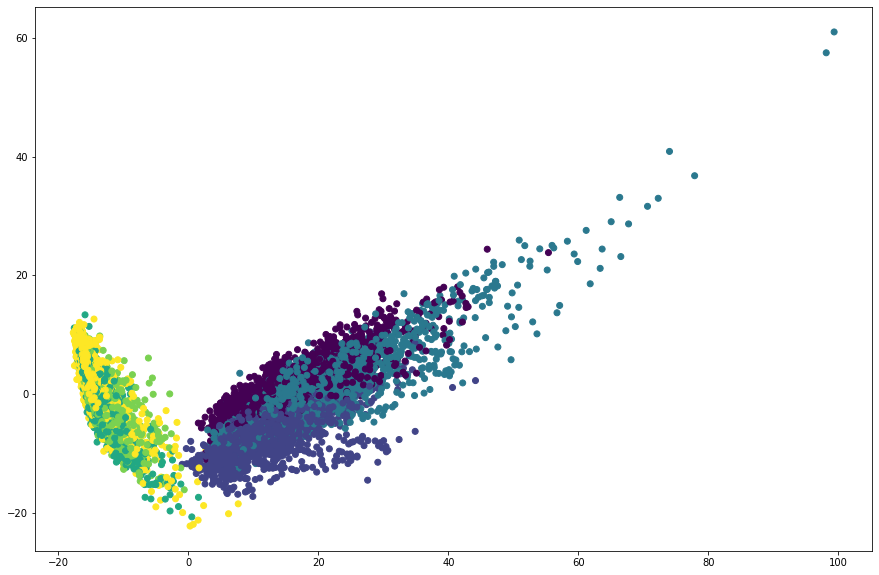

In [95]:
plt.figure(figsize=(15,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

* Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью.  

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n)
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

* Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

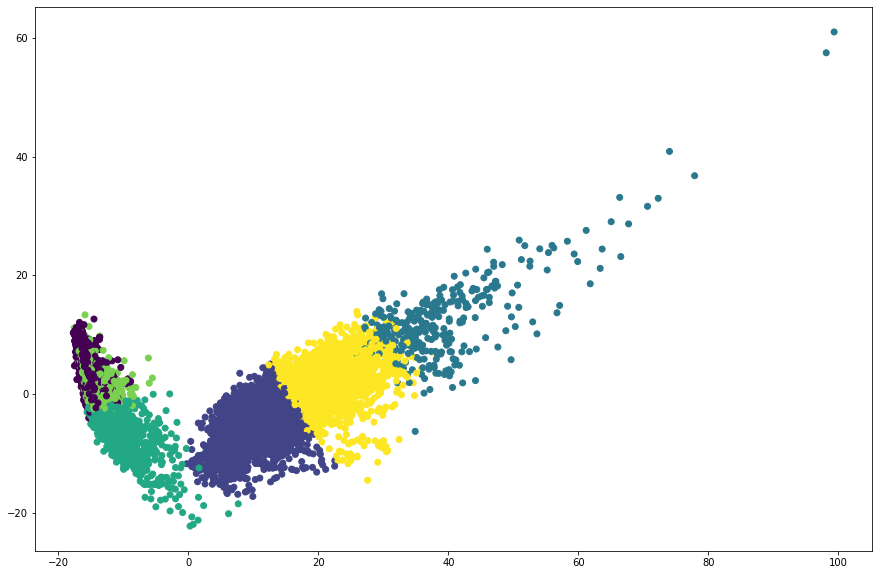

In [89]:
plt.figure(figsize=(15,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_);

* Сделайте кластеризацию с помощью агломеративного метода. 

In [92]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=n,linkage='ward').fit(X_reduced)

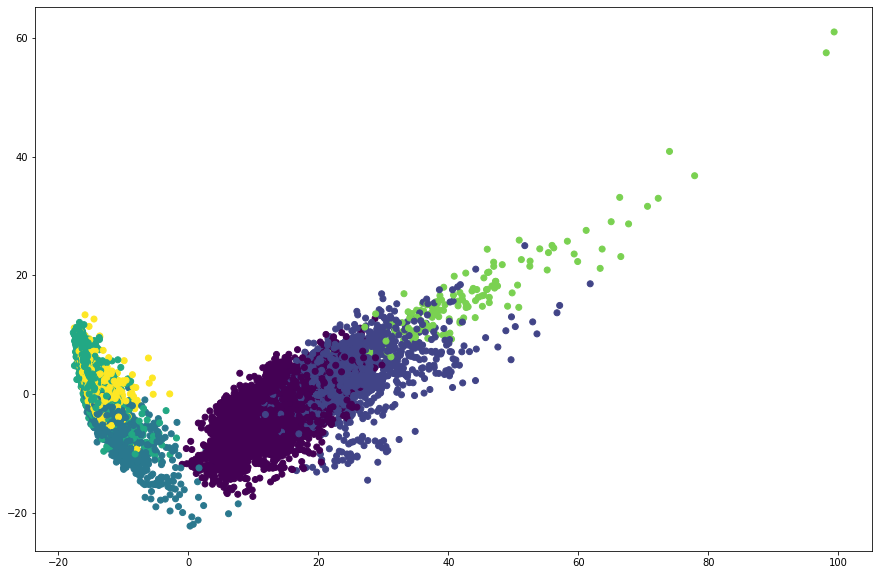

In [94]:
plt.figure(figsize=(15,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = ag.labels_);

* Cравните работу двух алгоритмов по значениям [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index).

**Adjusted Rand Index (ARI)**

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ - число объектов в выборке. Обозначим через $a$ - число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ - число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).

In [96]:
from sklearn.metrics.cluster import adjusted_rand_score

In [101]:
print('KMeans ARI : ', adjusted_rand_score(y, kmeans.labels_))
print('AgglomerativeClustering ARI : ', adjusted_rand_score(y, ag.labels_))

KMeans ARI :  0.41922096055141284
AgglomerativeClustering ARI :  0.4598748901093879
